In [ ]:
#Importing libraries

import pandas as pd
import numpy as np

#For visualization, we import (matplotlib.pyplot as plt and seaborn as sns)
import matplotlib.pyplot as plt
import seaborn as sns

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#For modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
##For evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
custchurn_dtf=pd.read_csv("customerchurn.csv")

In [ ]:
custchurn_dtf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dropping the customerID column and updating the original dataframe
custchurn_dtf.drop(columns=["customerID","MonthlyCharges"], inplace=True)

In [ ]:
custchurn_dtf.shape

(7043, 19)

In [ ]:
custchurn_dtf.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
Churn               0
dtype: int64

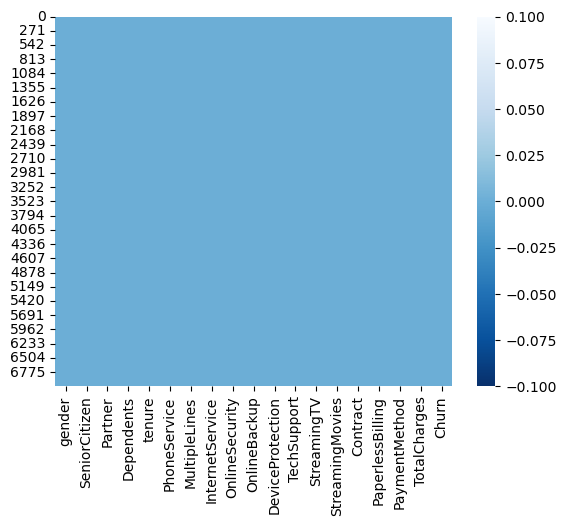

In [ ]:
#Visualizing missing values utilizing heatmap
sns.heatmap(custchurn_dtf.isna(),cbar=True, cmap="Blues_r");

In [ ]:
custchurn_dtf.dtypes

gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [ ]:
## Selecting all categorical features from the dataframe (columns with data type 'object')
# and storing them in the variable 'cat_features'. These columns typically include string or text data.
cat_features=custchurn_dtf.select_dtypes(include="object")

In [ ]:
list_cat_features=cat_features.columns.to_list()

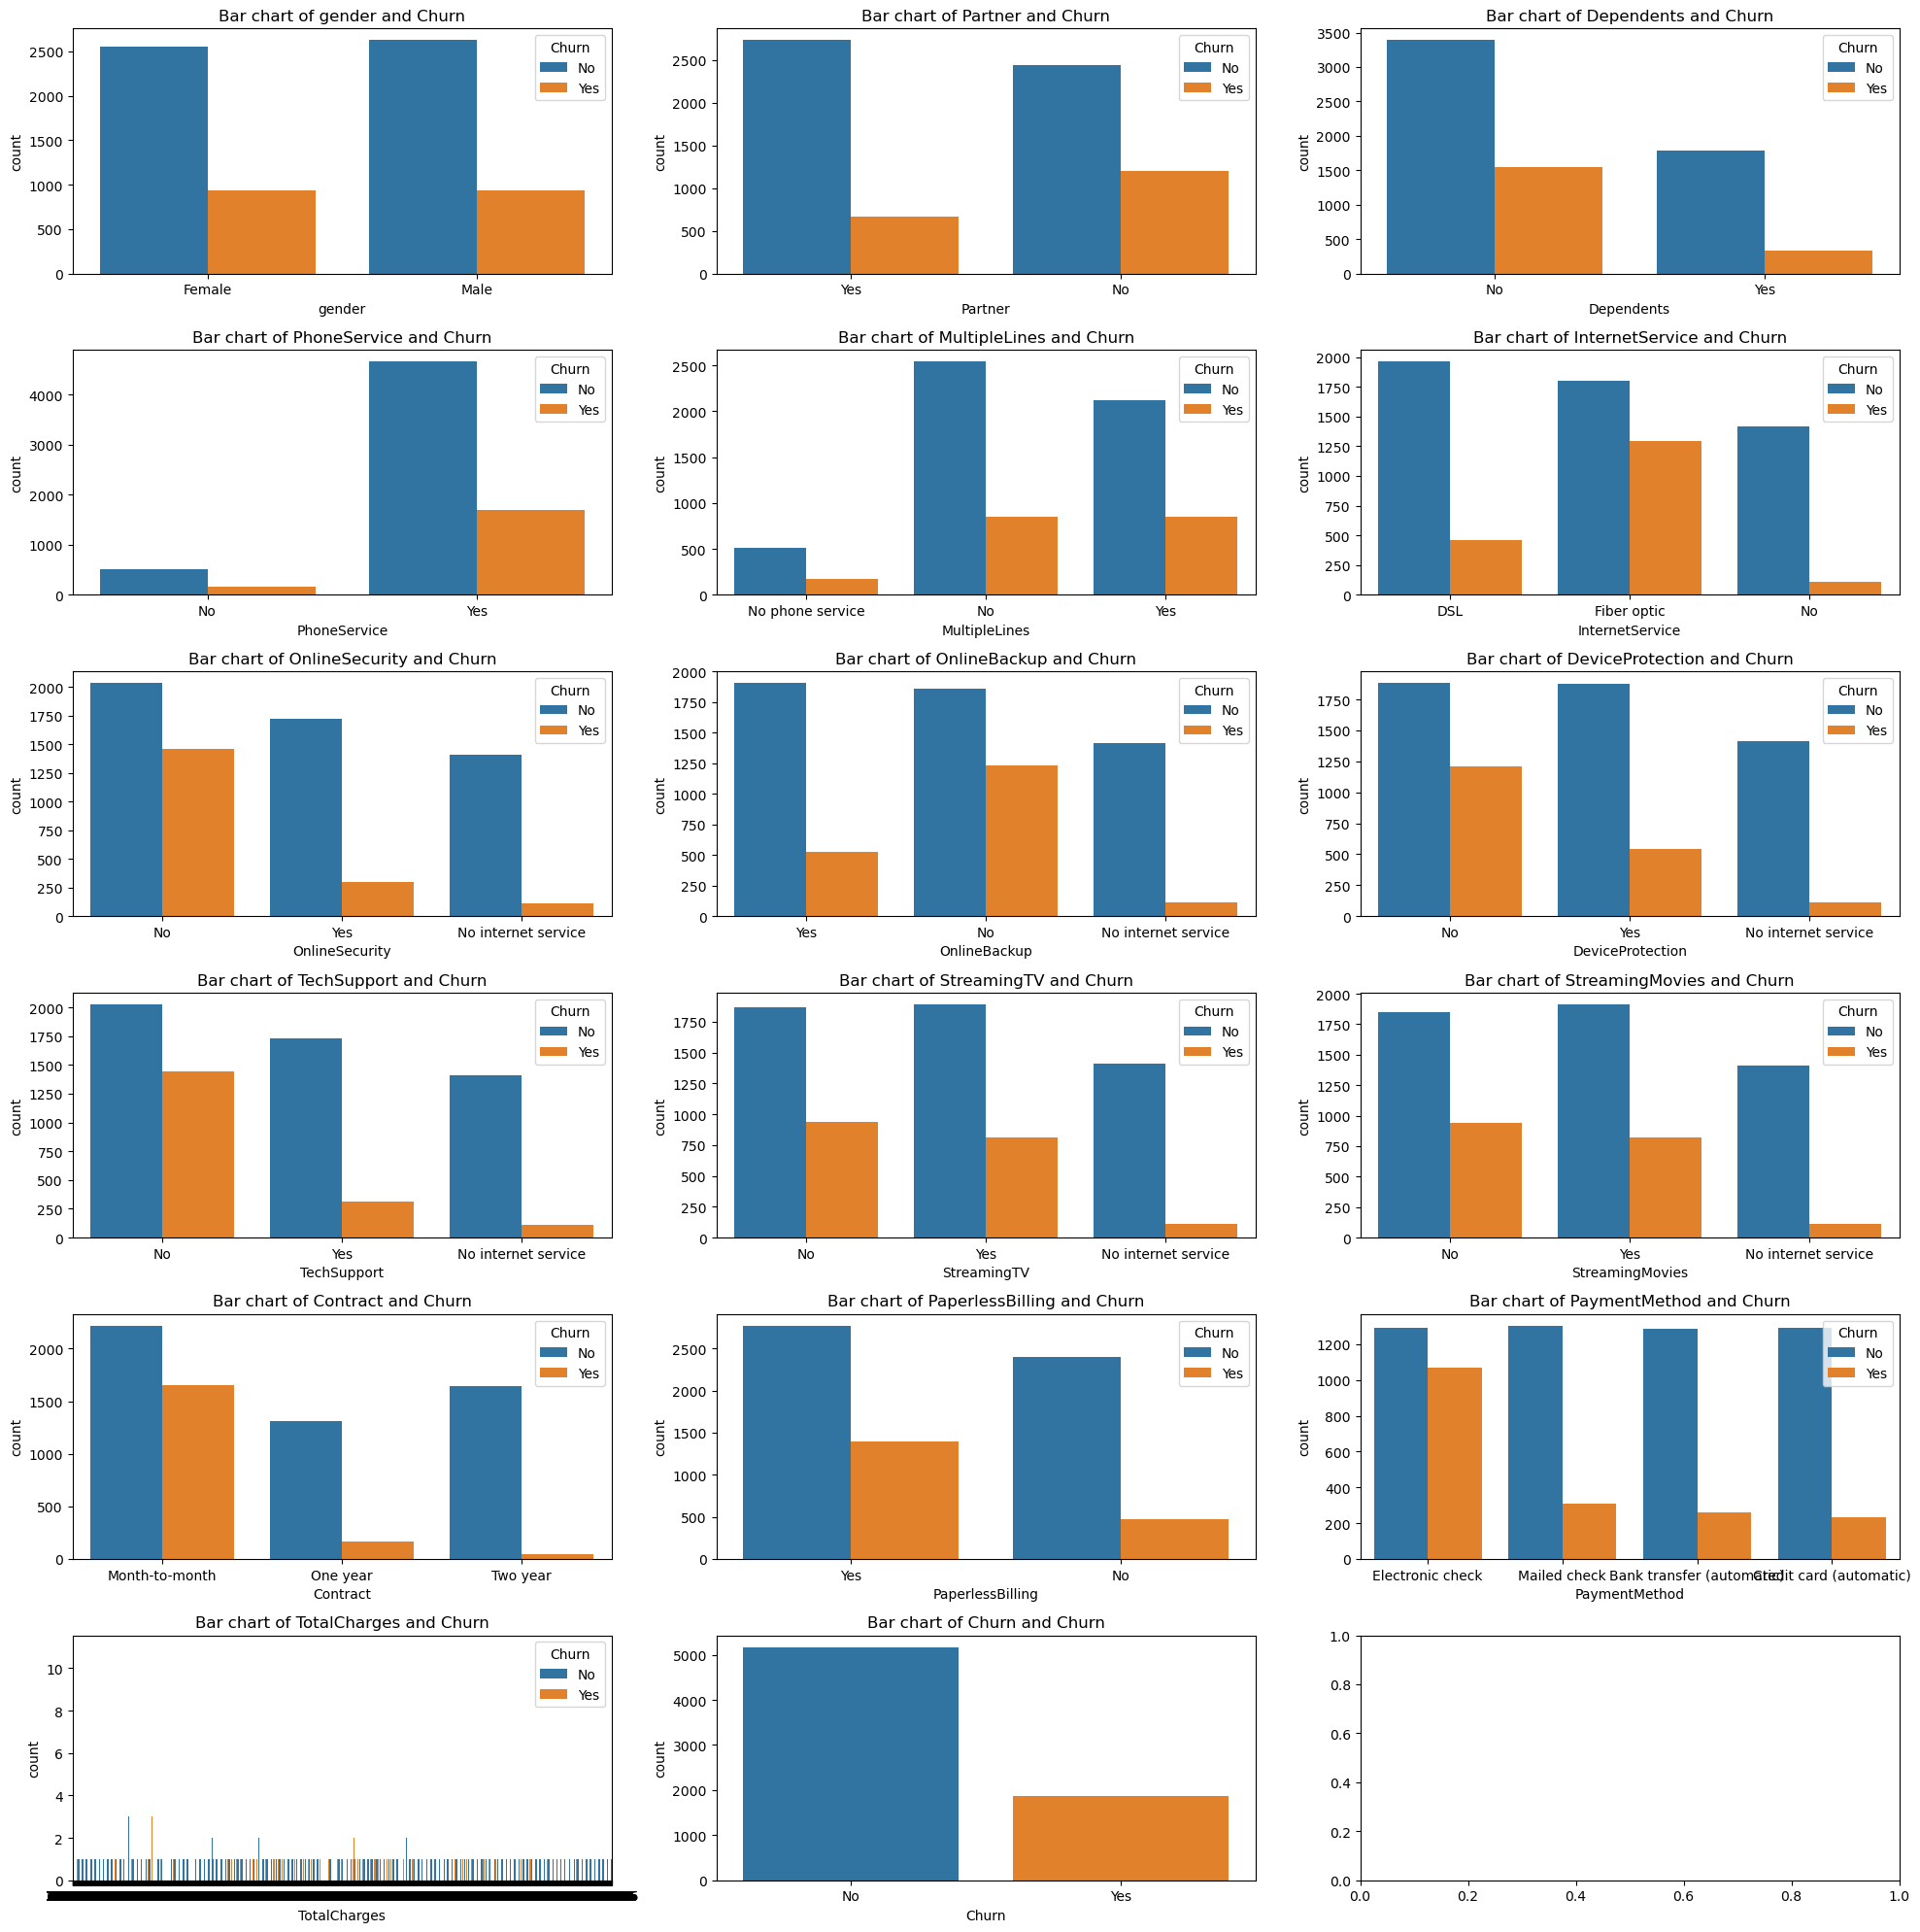

In [ ]:
# We create a grid of subplots to visualize the relationship between each categorical feature and "Churn".
# Plotting a countplot for each feature with "Churn" as the hue, setting individual titles for clarity.
# Adjusting the layout to ensure the plots are well-aligned and visually appealing.
fig, axes = plt.subplots(nrows= 6, ncols= 3, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(list_cat_features):
    sns.countplot(data = cat_features, x = feature, hue = custchurn_dtf["Churn"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Churn")

plt.tight_layout()

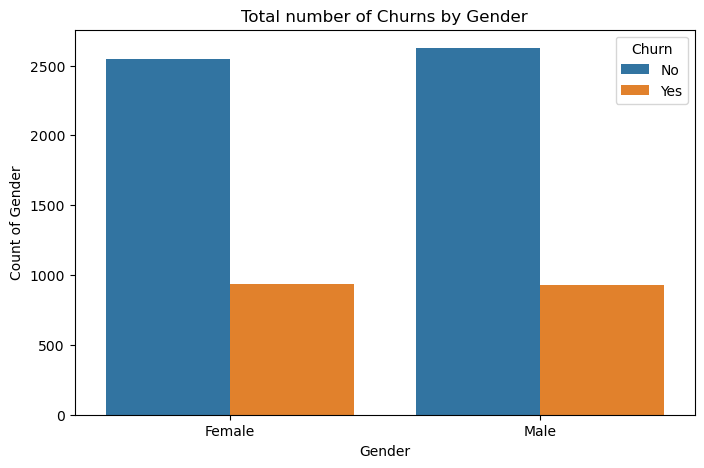

In [ ]:
# We create a bar plot to visualize the distribution of churn by gender.
# The 'hue' parameter separates the data by churn status for comparison.
# Adjusting the plot size and layout for better readability.
plt.figure(figsize=(8,5))
sns.countplot(x="gender", data=custchurn_dtf, hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Count of Gender")
plt.title("Total number of Churns by Gender");

In [ ]:
# Looping through categorical columns and display unique values with their counts in the specified format
for col in custchurn_dtf.select_dtypes(include=['object']).columns:
    print(f"{col}")
    print(custchurn_dtf[col].value_counts())
    print()

gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
TechSupport
No              

In [ ]:
custchurn_dtf.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No


In [ ]:
#Applying binary encoding
custchurn_dtf['gender'] = custchurn_dtf['gender'].map({'Male': 1, 'Female': 0})
custchurn_dtf['Partner'] = custchurn_dtf['Partner'].map({'Yes': 1, 'No': 0})
custchurn_dtf['Dependents'] = custchurn_dtf['Dependents'].map({'Yes': 1, 'No': 0})
custchurn_dtf['PhoneService'] = custchurn_dtf['PhoneService'].map({'Yes': 1, 'No': 0})
custchurn_dtf['MultipleLines'] = custchurn_dtf['MultipleLines'].map({'Yes': 1,'No phone service':0, 'No': 0})
custchurn_dtf['OnlineSecurity'] = custchurn_dtf['OnlineSecurity'].map({'Yes': 1,'No internet service':0, 'No': 0})
custchurn_dtf['OnlineBackup'] = custchurn_dtf['OnlineBackup'].map({'Yes': 1, 'No internet service':0,'No': 0})
custchurn_dtf['DeviceProtection'] = custchurn_dtf['DeviceProtection'].map({'Yes': 1,'No internet service':0, 'No': 0})
custchurn_dtf['TechSupport'] = custchurn_dtf['TechSupport'].map({'Yes': 1,'No internet service':0, 'No': 0})
custchurn_dtf['StreamingTV'] = custchurn_dtf['StreamingTV'].map({'Yes': 1, 'No internet service':0,'No': 0})
custchurn_dtf['StreamingMovies'] = custchurn_dtf['StreamingMovies'].map({'Yes': 1,'No internet service':0, 'No': 0})
custchurn_dtf['PaperlessBilling'] = custchurn_dtf['PaperlessBilling'].map({'Yes': 1, 'No': 0})
custchurn_dtf['Churn'] = custchurn_dtf['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
custchurn_dtf.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),1840.75,0


In [ ]:
custchurn_dtf.shape

(7043, 19)

In [ ]:
#Converting InternetService, Contract and PaymentMethod to numerical variables using one-hot-note encoder
# Applying One-Hot Encoding to the 'InternetService' column with '_enc' suffix for new columns
InternetService_encoded = pd.get_dummies(custchurn_dtf['InternetService'], prefix='InternetService_enc', drop_first=True).astype(int)

# We concatenate the new encoded columns to the original DataFrame
custchurn_dtf = pd.concat([custchurn_dtf, InternetService_encoded], axis=1)

# Dropping the original 'InternetService' column
custchurn_dtf.drop(columns=['InternetService'], inplace=True)

In [ ]:
#Conversion of InternetService, Contract and PaymentMethod to numerical variables using one-hot-note encoder
# Applying One-Hot Encoding to the 'Contract' column with '_enc' suffix for new columns
Contract_encoded = pd.get_dummies(custchurn_dtf['Contract'], prefix='Contract_enc', drop_first=True).astype(int)

# Concatenating the new encoded columns to the original DataFrame
custchurn_dtf = pd.concat([custchurn_dtf, Contract_encoded], axis=1)

# Dropping the original 'Contract' column
custchurn_dtf.drop(columns=['Contract'], inplace=True)

In [ ]:
#Converting InternetService, Contract and PaymentMethod to numerical variables using one-hot-note encoder
# Apply One-Hot Encoding to the 'PaymentMethod' column with '_enc' suffix for new columns
PaymentMethod_encoded = pd.get_dummies(custchurn_dtf['PaymentMethod'], prefix='PaymentMethod_enc', drop_first=True).astype(int)

# Concatenating the new encoded columns to the original DataFrame
custchurn_dtf = pd.concat([custchurn_dtf, PaymentMethod_encoded], axis=1)

# Dropping the original 'PaymentMethod' column
custchurn_dtf.drop(columns=['PaymentMethod'], inplace=True)

# Displaying the first few 4 rows of the modified DataFrame to verify
custchurn_dtf.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,TotalCharges,Churn,InternetService_enc_Fiber optic,InternetService_enc_No,Contract_enc_One year,Contract_enc_Two year,PaymentMethod_enc_Credit card (automatic),PaymentMethod_enc_Electronic check,PaymentMethod_enc_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1889.5,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1840.75,0,0,0,1,0,0,0,0


In [ ]:
custchurn_dtf.dtypes

gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
StreamingTV                                   int64
StreamingMovies                               int64
PaperlessBilling                              int64
TotalCharges                                 object
Churn                                         int64
InternetService_enc_Fiber optic               int32
InternetService_enc_No                        int32
Contract_enc_One year                         int32
Contract_enc

In [ ]:
# Replacing empty strings in TotalCharges with NaN
custchurn_dtf['TotalCharges'] = custchurn_dtf['TotalCharges'].replace(' ', np.nan)

# Converting TotalCharges to numeric
custchurn_dtf['TotalCharges'] = pd.to_numeric(custchurn_dtf['TotalCharges'])

# Calculating the median value of TotalCharges
median_total_charges = custchurn_dtf['TotalCharges'].median()

# Replacing NaN values with the median
custchurn_dtf['TotalCharges'].fillna(median_total_charges, inplace=True)


In [ ]:
custchurn_dtf.dtypes


gender                                         int64
SeniorCitizen                                  int64
Partner                                        int64
Dependents                                     int64
tenure                                         int64
PhoneService                                   int64
MultipleLines                                  int64
OnlineSecurity                                 int64
OnlineBackup                                   int64
DeviceProtection                               int64
TechSupport                                    int64
StreamingTV                                    int64
StreamingMovies                                int64
PaperlessBilling                               int64
TotalCharges                                 float64
Churn                                          int64
InternetService_enc_Fiber optic                int32
InternetService_enc_No                         int32
Contract_enc_One year                         

In [ ]:
custchurn_dtf.shape

(7043, 23)

<span style="font-size: 24px; font-weight: bold;">Exploratory Data Analysis</span>


In [ ]:
#Summary statistics
custchurn_dtf.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,TotalCharges,Churn,InternetService_enc_Fiber optic,InternetService_enc_No,Contract_enc_One year,Contract_enc_Two year,PaymentMethod_enc_Credit card (automatic),PaymentMethod_enc_Electronic check,PaymentMethod_enc_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,0.592219,2281.916928,0.265370,0.439585,0.216669,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,0.491457,2265.270398,0.441561,0.496372,0.412004,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3786.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import math

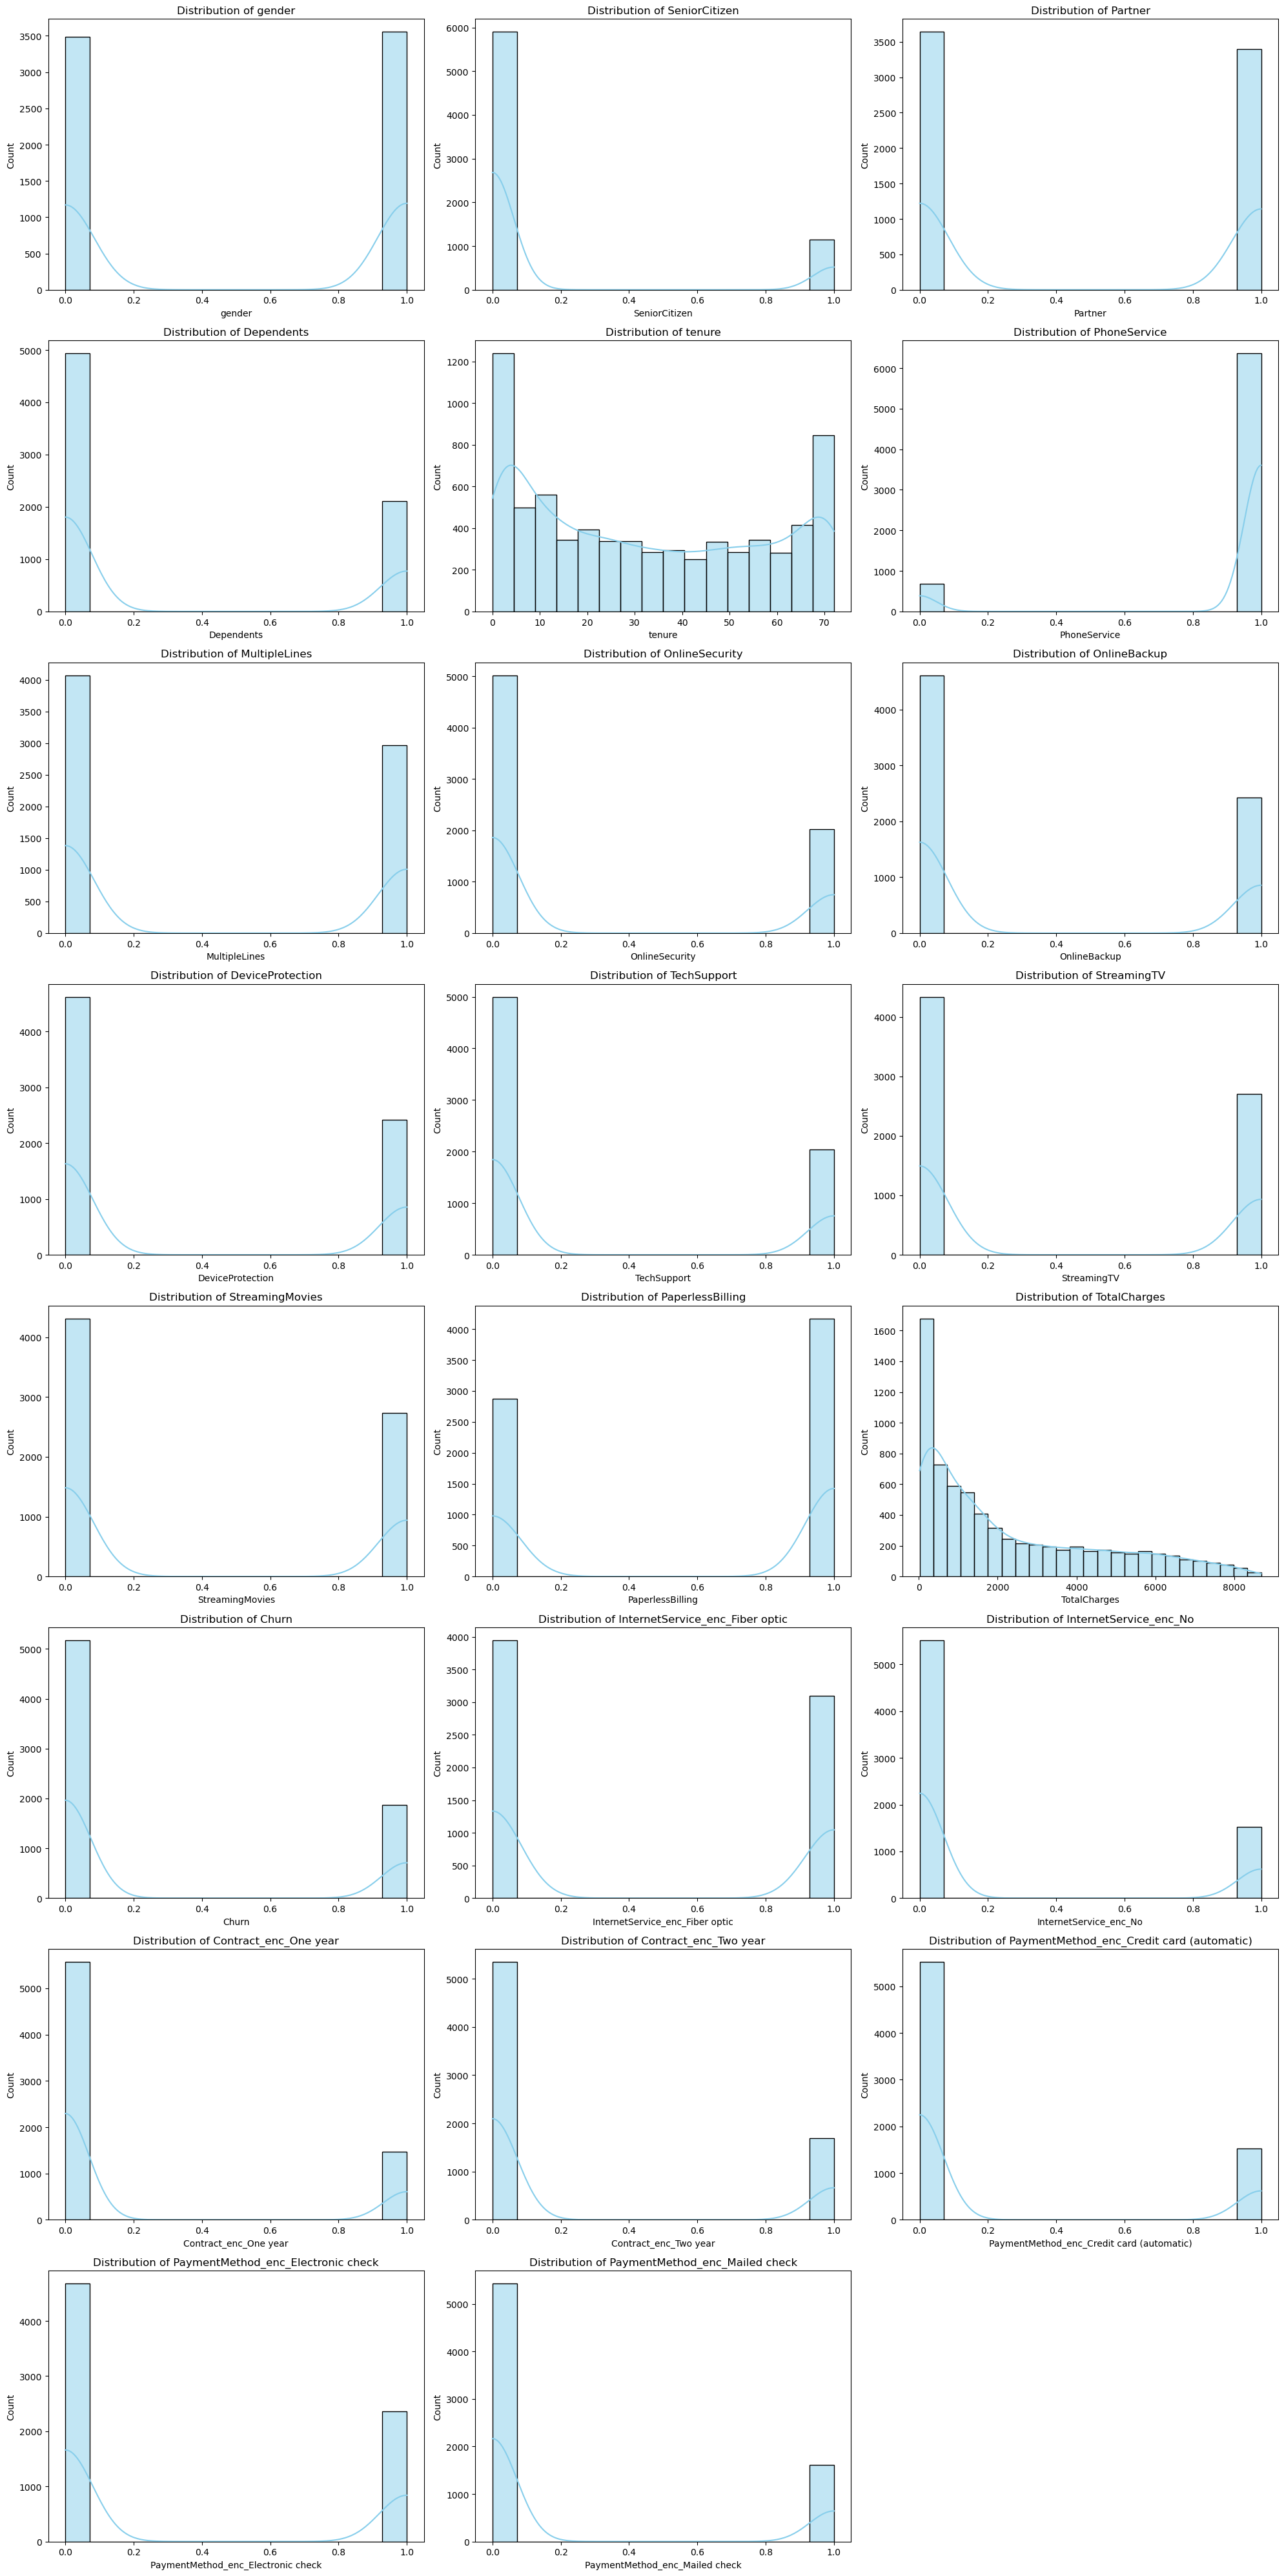

In [ ]:
# Number of columns in the dataframe
num_cols = len(custchurn_dtf.columns)

# Setting up the grid dimensions
rows = math.ceil(num_cols / 3)  # Adjust number of rows based on 3 columns per row
fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 5))  # Adjust grid size
axes = axes.flatten()  # Flatten axes for easy indexing

# Plotting each column
for i, col in enumerate(custchurn_dtf.columns):
    if custchurn_dtf[col].dtype in ['int64', 'int32', 'float64']:  # Numerical columns
        sns.histplot(custchurn_dtf[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
    else:  # Categorical columns
        sns.countplot(x=custchurn_dtf[col], ax=axes[i], palette='Set2')
        axes[i].set_title(f'Count of {col}')

# Removing empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.show()

#The chart reveals that there are more male customers (3,555) than female customers (3,488). The number of customers with phone service (6,361) is nine times greater than those without phone service (682). Additionally, 24% of the customers are on a two-year contract, with 1,695 out of 7,043 customers enrolled. 59% of the company's billing is paperless, and 34% of payments are made via electronic check. Around 27% of customers have discontinued the company's services.

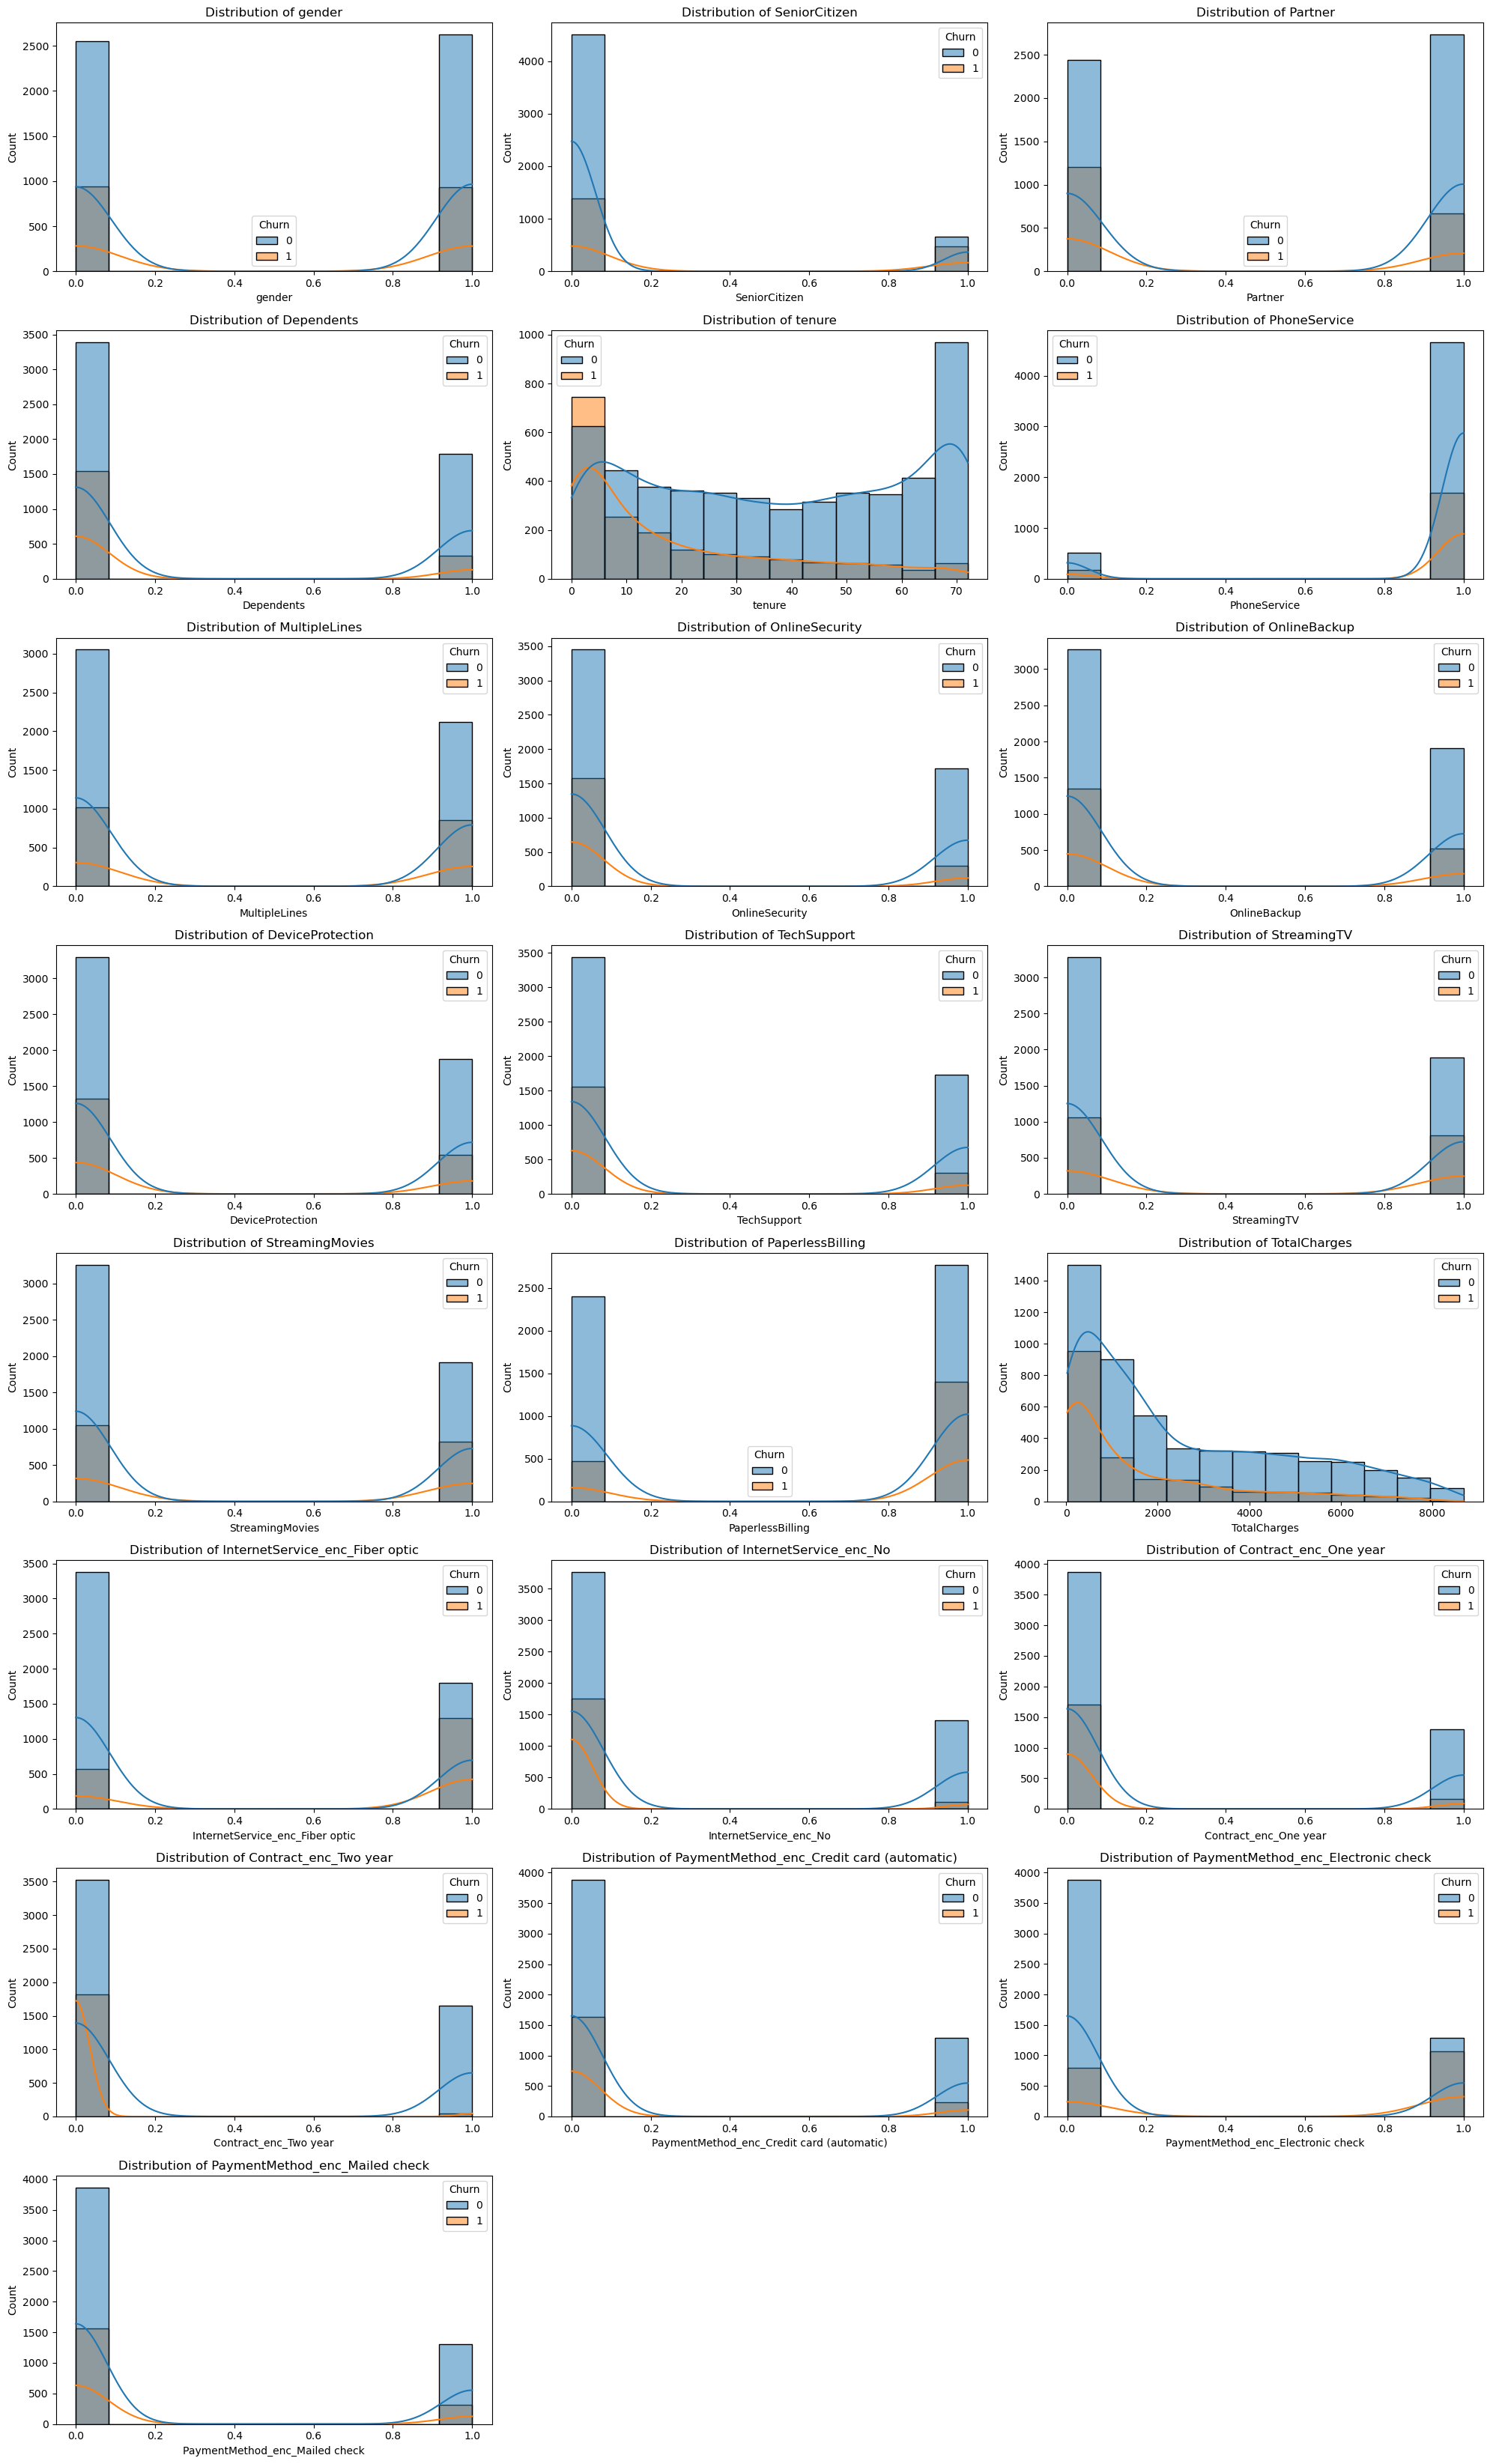

In [ ]:
# We specify the number of columns for the grid layout
num_columns = custchurn_dtf.columns.drop("Churn")  # Exclude 'Churn' from being plotted itself
fig, axes = plt.subplots(ncols=3, nrows=math.ceil(len(num_columns) / 3), figsize=(20, len(num_columns) * 1.5))

#We flatten the axes for easier indexing
positions = axes.flatten()

# We loop through each column and plot with Churn as hue
for index, name_feature in enumerate(num_columns):
    if custchurn_dtf[name_feature].dtype in ['int64', 'int32', 'float64']:  # Numerical columns
        sns.histplot(data=custchurn_dtf, x=name_feature, hue="Churn", kde=True, ax=positions[index], bins=12).set_title(f'Distribution of {name_feature}')
    else:  # Categorical columns
        sns.countplot(data=custchurn_dtf, x=name_feature, hue="Churn", ax=positions[index], palette='Set2').set_title(f'Count of {name_feature}')

# Hiding unused subplots
for ax in positions[len(num_columns):]:
    ax.set_visible(False)

# We adjust layout for readability
plt.tight_layout()
plt.show()

The chart reveals that there are more male customers (3,555) than female customers (3,488). The number of customers with phone service (6,361) is nine times greater than those without phone service (682). Additionally, 24% of the customers are on a two-year contract, with 1,695 out of 7,043 customers enrolled. 59% of the company's billing is paperless, and 34% of payments are made via electronic check. Around 27% of customers have discontinued the company's services.

# <span style="font-size: 24px; font-weight: bold;">Multivariate Analysis</span>


In [ ]:
#We calculate the correlation matrix for the numerical columns in the 'custchurn_dtf' DataFrame.
custchurn_dtf.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,TotalCharges,Churn,InternetService_enc_Fiber optic,InternetService_enc_No,Contract_enc_One year,Contract_enc_Two year,PaymentMethod_enc_Credit card (automatic),PaymentMethod_enc_Electronic check,PaymentMethod_enc_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,-0.011754,-0.000002,-0.008612,-0.011286,0.006026,0.008026,-0.003695,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,0.156530,0.102652,0.150889,0.255338,-0.182742,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.014877,0.318364,-0.150448,0.000304,0.000615,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,-0.111377,0.063593,-0.164221,-0.165818,0.139812,0.068368,0.204613,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.006152,0.825464,-0.352229,0.019720,-0.039062,0.202570,0.558533,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,0.016505,0.113013,0.011942,0.289999,0.172209,-0.002791,0.003519,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,0.163530,0.468705,0.040102,0.366083,-0.210564,-0.003794,0.106253,0.060048,0.083618,-0.227206
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,-0.003636,0.412091,-0.171226,-0.030696,-0.333403,0.100162,0.191773,0.115721,-0.112338,-0.080798
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.126735,0.509607,-0.082255,0.165651,-0.381593,0.083722,0.111400,0.090785,-0.000408,-0.174164
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.103797,0.522374,-0.066160,0.176049,-0.380754,0.102495,0.165096,0.111554,-0.003351,-0.187373


<Axes: >

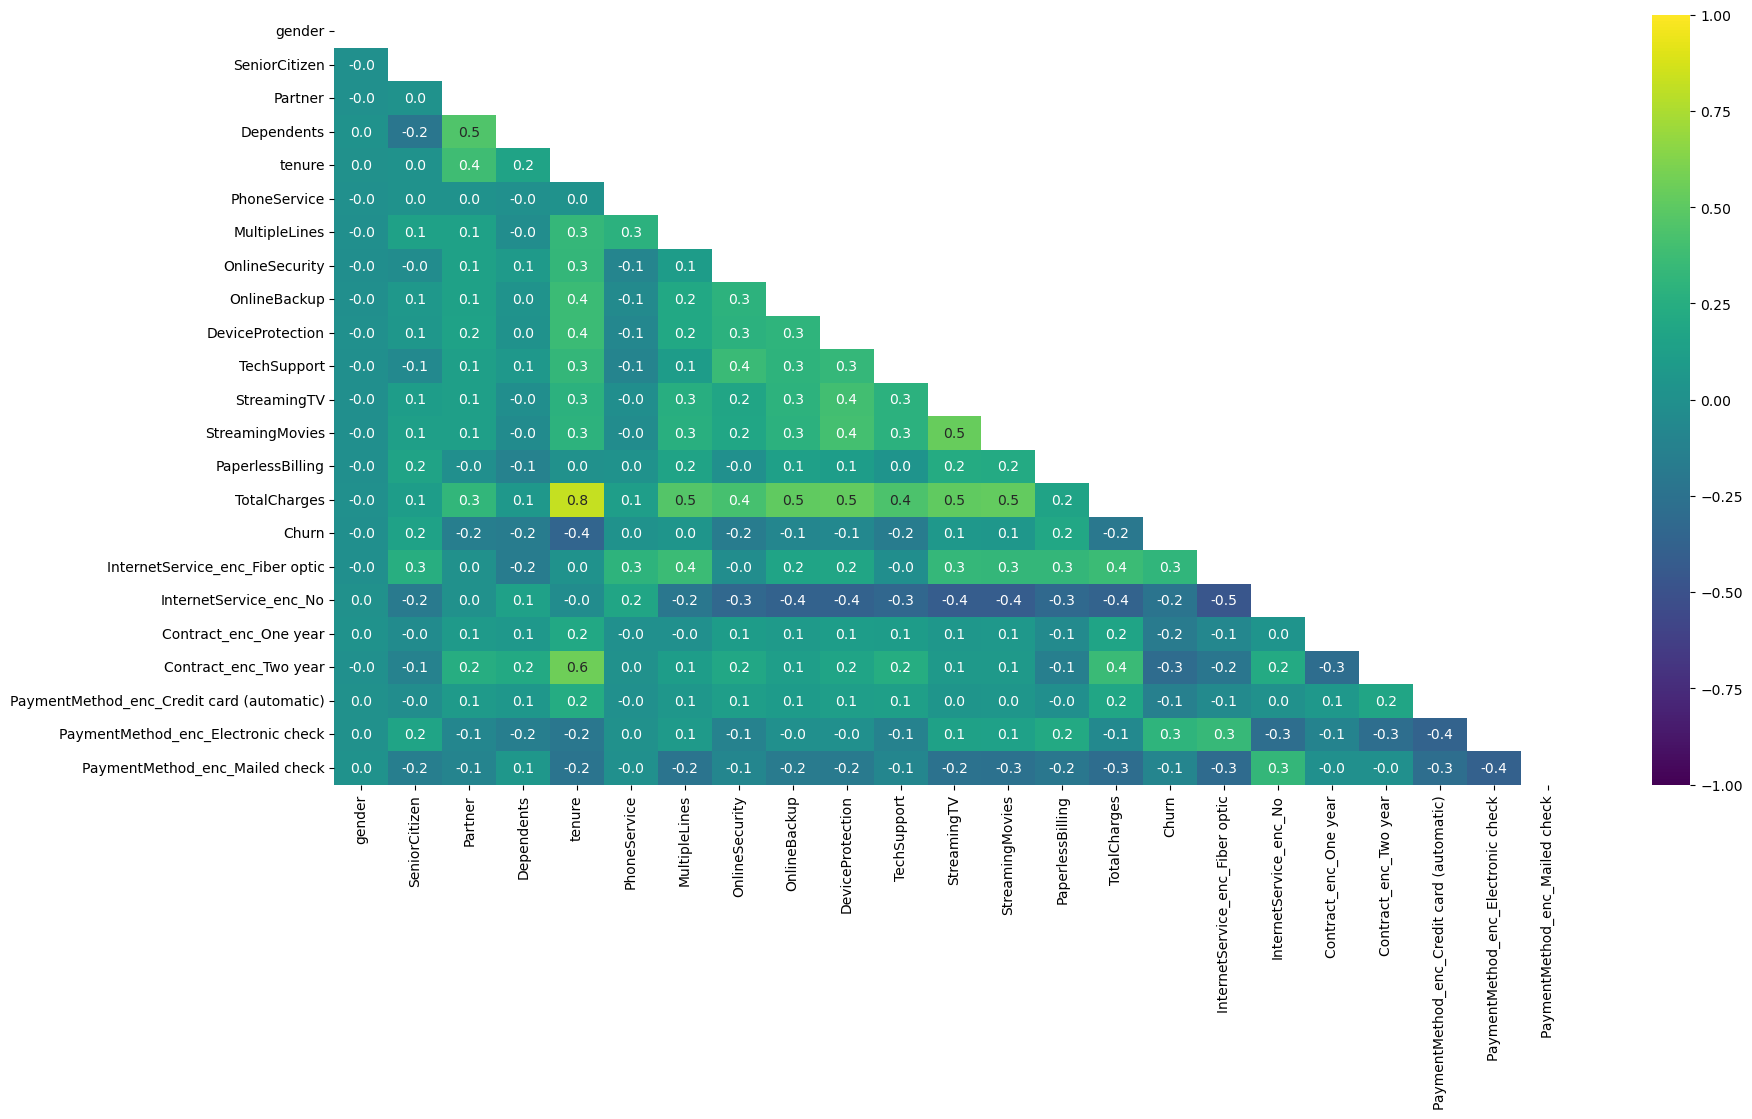

In [ ]:
#We plot a heatmap of the correlation matrix for 'custchurn_dtf', displaying only the lower triangle of the matrix with annotations and a color scale from -1 to 1.
my_mask = np.triu(np.ones_like(custchurn_dtf.corr(), dtype = bool))

plt.figure(figsize = (20,10))
sns.heatmap(data = custchurn_dtf.corr(), cmap = "viridis", vmin = -1, vmax = 1, fmt = ".1f", annot = True, mask = my_mask )

#The correlation matrix shows that gender, phone service,multiplelines has no relatioship with churn rate. Futhermore, Seniorcitizen, Treaming TV, , Streaming Movies, paperlessbilling,and paymentMethod_enc have a weak positive effect with churn while Partner, Dependents,OnlineBackup and DeviceProtection have a weak negative rellationship with customer churn rate.The Key factors influecing Customer Churn rates are Tenure, OnlineSecurity, Techsupport and contract.

# <span style="font-size: 24px; font-weight: bold;">Modelling</span>


In [ ]:
#Splitting the dataset
X = custchurn_dtf.drop(["Churn"], axis=1)
y = custchurn_dtf["Churn"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2, random_state=156, stratify=y)

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int64), array([4139, 1495], dtype=int64))
(array([0, 1], dtype=int64), array([1035,  374], dtype=int64))


In [ ]:
#We scale the dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit(X_train)
# transform
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [ ]:
#We perform hyperparameter tuning for a Random Forest Classifier utilizing GridSearchCV with a 5-fold cross-validation
print("Random Forest Classifier with Hyperparameter Tuning:")
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

Random Forest Classifier with Hyperparameter Tuning:
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
#Evaluating Random Forest
rf_best = rf_grid.best_estimator_
rf_y_pred = rf_best.predict(X_test)
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on Test Set: 0.8048261178140526
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



Random Forest Confusion Matrix:


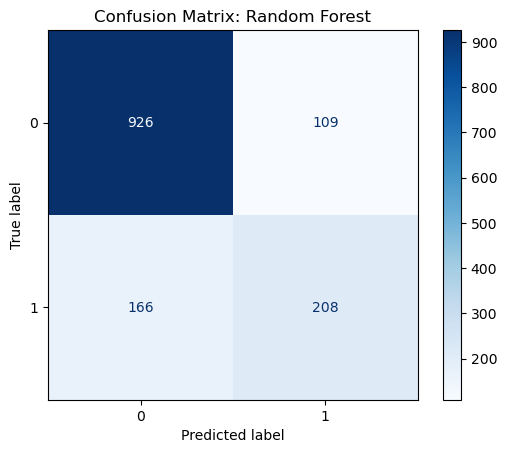

In [ ]:
# We visualize function for the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Random Forest Confusion Matrix
print("Random Forest Confusion Matrix:")
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest")

In [ ]:
#K-Nearest Neighbors (KNN) with Hyperparameter Tuning
print("\nK-Nearest Neighbors (KNN) with Hyperparameter Tuning:")
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)


K-Nearest Neighbors (KNN) with Hyperparameter Tuning:
Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
# Evaluating KNN
knn_best = knn_grid.best_estimator_
knn_y_pred = knn_best.predict(X_test_scaled)
print("Best Parameters:", knn_grid.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, knn_y_pred))
print("Classification Report:\n", classification_report(y_test, knn_y_pred))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy on Test Set: 0.7707594038325053
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.57      0.56      0.57       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409




KNN Confusion Matrix:


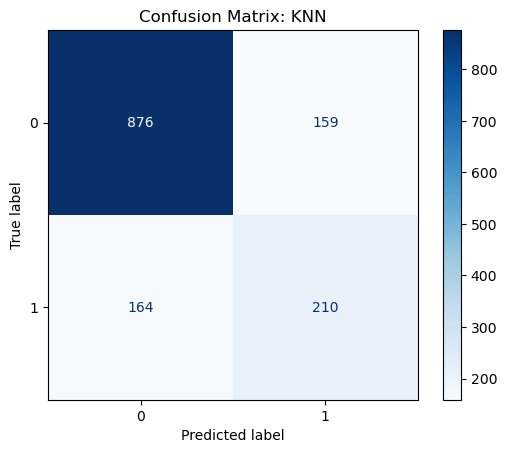

In [ ]:
 We visualize function for the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()
# KNN Confusion Matrix
print("\nKNN Confusion Matrix:")
plot_confusion_matrix(y_test, knn_y_pred, "KNN")

The Random Forest model outperforms the KNN model overall, with a higher accuracy (80% vs. 77%) and better performance on the minority class (Class 1), as shown by its higher F1-score for Class 1 (0.60 vs. 0.57) and macro average F1-score (0.74 vs. 0.70). While both models perform well on the majority class (Class 0), the Random Forest model balances the trade-off between precision and recall more effectively, particularly for the minority class, which is often critical in imbalanced datasets.
When comparing the confusion matrices, the Random Forest model has better overall performance, as shown by its higher true negative count (926) compared to KNN (876), indicating better accuracy in identifying class 0. However, KNN slightly outperforms Random Forest in identifying true positives, with 210 correct predictions for class 1 compared to 208 for Random Forest. On the downside, KNN has a higher false positive count (159) compared to Random Forest (109), which suggests that KNN misclassifies more class 0 samples as class 1. Similarly, Random Forest has a slightly higher false negative count (166) than KNN (164). These results suggest that Random Forest offers more robust overall performance, particularly for class 0, but KNN shows a marginal edge in class 1 detection.
Additionally, Random Forest is generally more robust to noise and handles high-dimensional data better. Based on these metrics, Random Forest is the recommended model.
